In [1]:
library('forecast')
library('tseries')

In [2]:
x <- c(5,4,3,2,3,2,1,2,2,3,3,4,5,4,4,7,6,7,8,9,9,7,6,5,
       4,4,3,2,4,2,2,3,2,4,3,4,5,6,5,7,8,8,8,8,7,7,6,6,
       6,4,3,2,3,2,3,2,2,3,4,4,5,5,6,6,7,7,8,9,8,7,4,5,
       3,4,3,2,3,2,1,2,1,3,4,4,5,6,5,7,8,6,7,8,8,6,6,4)

In [3]:
balance_account <- ts(x, start=c(17, 9), end=c(21, 9), frequency=24)

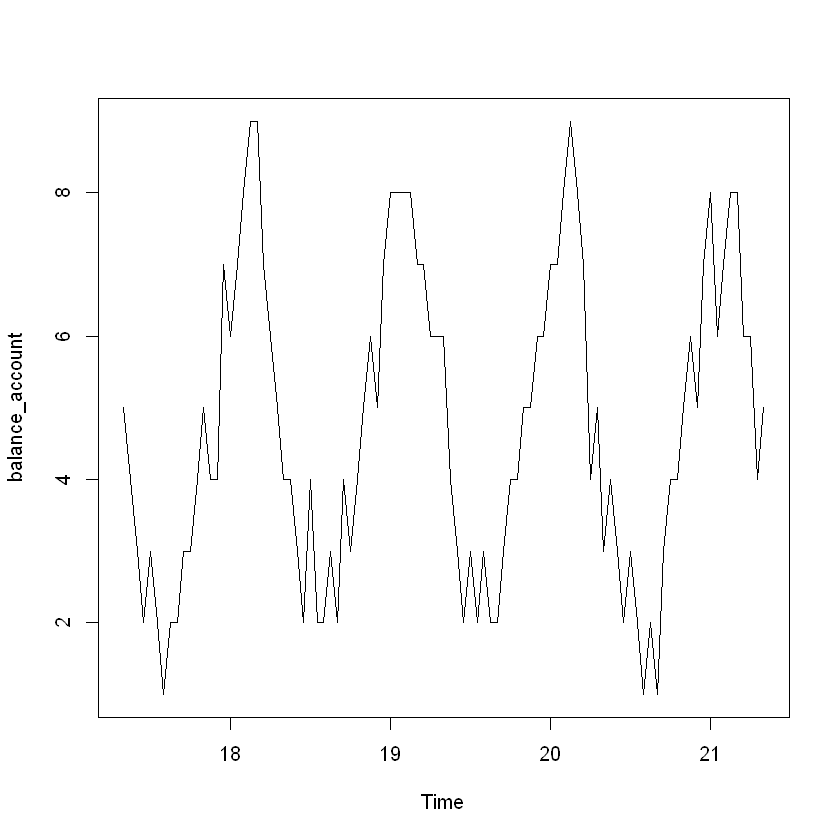

In [4]:
# plot series
plot(balance_account)

In [5]:
myDataArima = arima(balance_account, order = c(24,1,1))

In [6]:
myDataPred = predict(myDataArima, n.ahead=24*4)

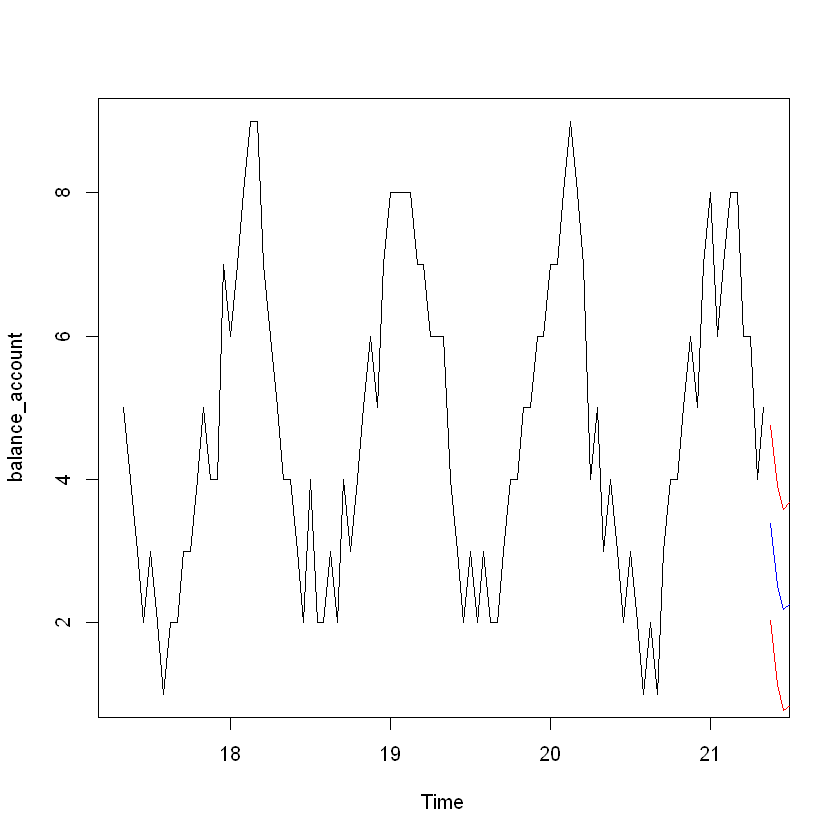

In [7]:
plot(balance_account)
lines(myDataPred$pred, col='blue')
lines(myDataPred$pred+2*myDataPred$se, col='red')
lines(myDataPred$pred-2*myDataPred$se, col='red')

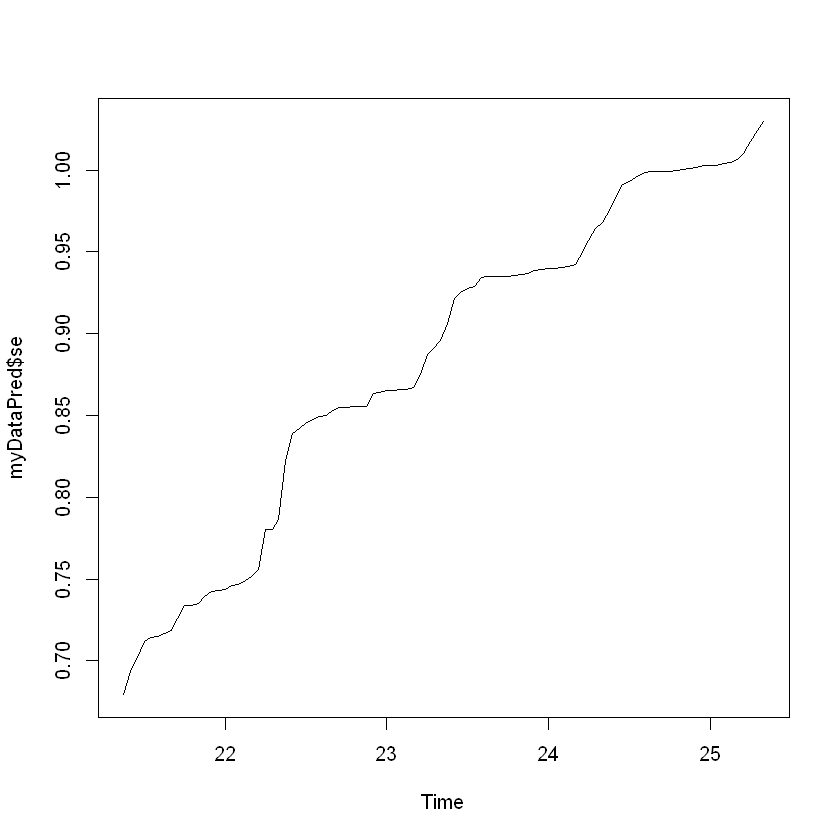

In [8]:
plot(myDataPred$se)

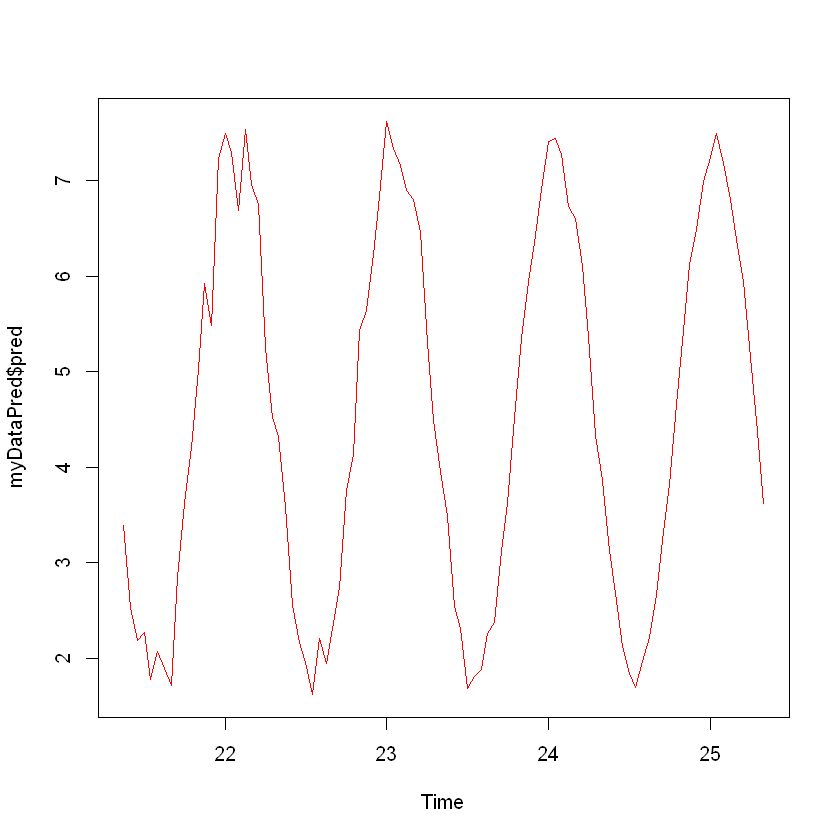

In [9]:
plot(myDataPred$pred)
lines(myDataPred$pred, col='red')